In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

C:\Users\sundar\AppData\Local\Temp\ipykernel_2852\2968556401.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
sparkling_df = pd.read_csv("Sparkling.csv", parse_dates= True, index_col= 'YearMonth')  # Sparkling
#index_col= 'YearMonth'
display(sparkling_df.index)
sparkling_df.head()

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [3]:
sparkling_df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [4]:
rose_df = pd.read_csv("Rose.csv", parse_dates=True, index_col='YearMonth')
display(rose_df.index)
rose_df.head()

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


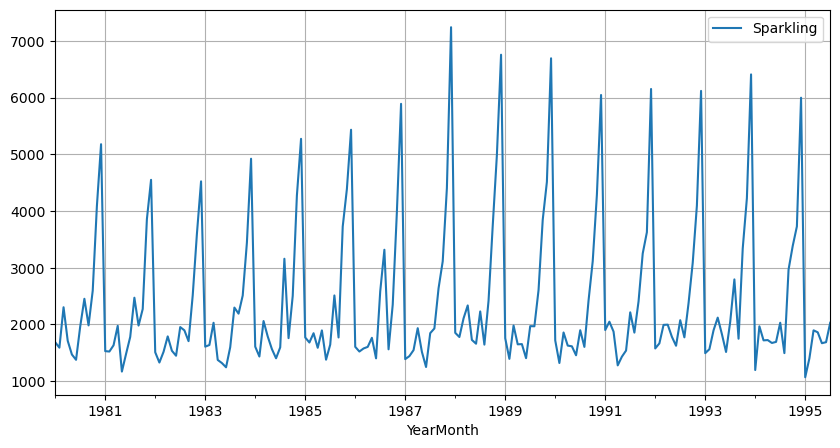

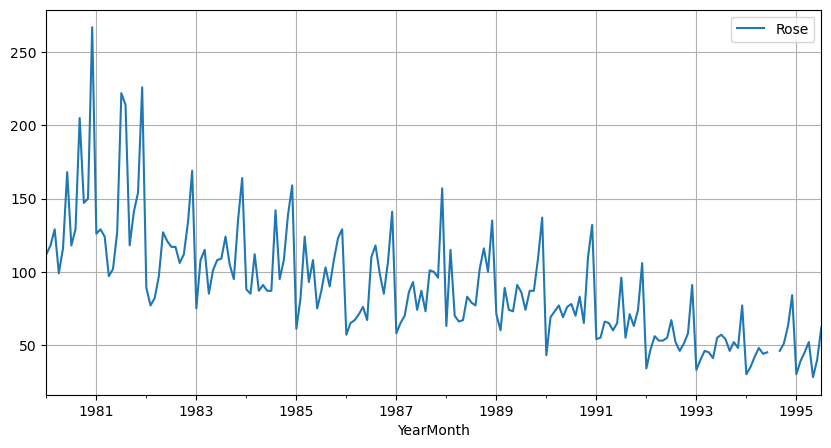

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
sparkling_df.plot(grid = True)
rose_df.plot(grid = True)
plt.show()

In [6]:
print("Sparkling:")
display(round(sparkling_df.describe(),3))
print("\nRose:")
display(round(rose_df.describe(),3))

Sparkling:


,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000



Rose:


,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [7]:
display(sparkling_df.isna().sum())
display(rose_df.isna().sum())

rose_df.fillna(method = 'bfill', inplace=True)

display(rose_df.isna().sum())
rose_df.shape

Sparkling    0
dtype: int64

Rose    2
dtype: int64

Rose    0
dtype: int64

(187, 1)

In [8]:
sparkling_df1 = sparkling_df.copy()
sparkling_df1['Year'] = sparkling_df1.index.year
sparkling_df1['Month'] = sparkling_df1.index.month
display(sparkling_df1.head())

rose_df1 = rose_df.copy()
rose_df1['Year'] = rose_df1.index.year
rose_df1['Month'] = rose_df1.index.month
display(rose_df1.head())

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


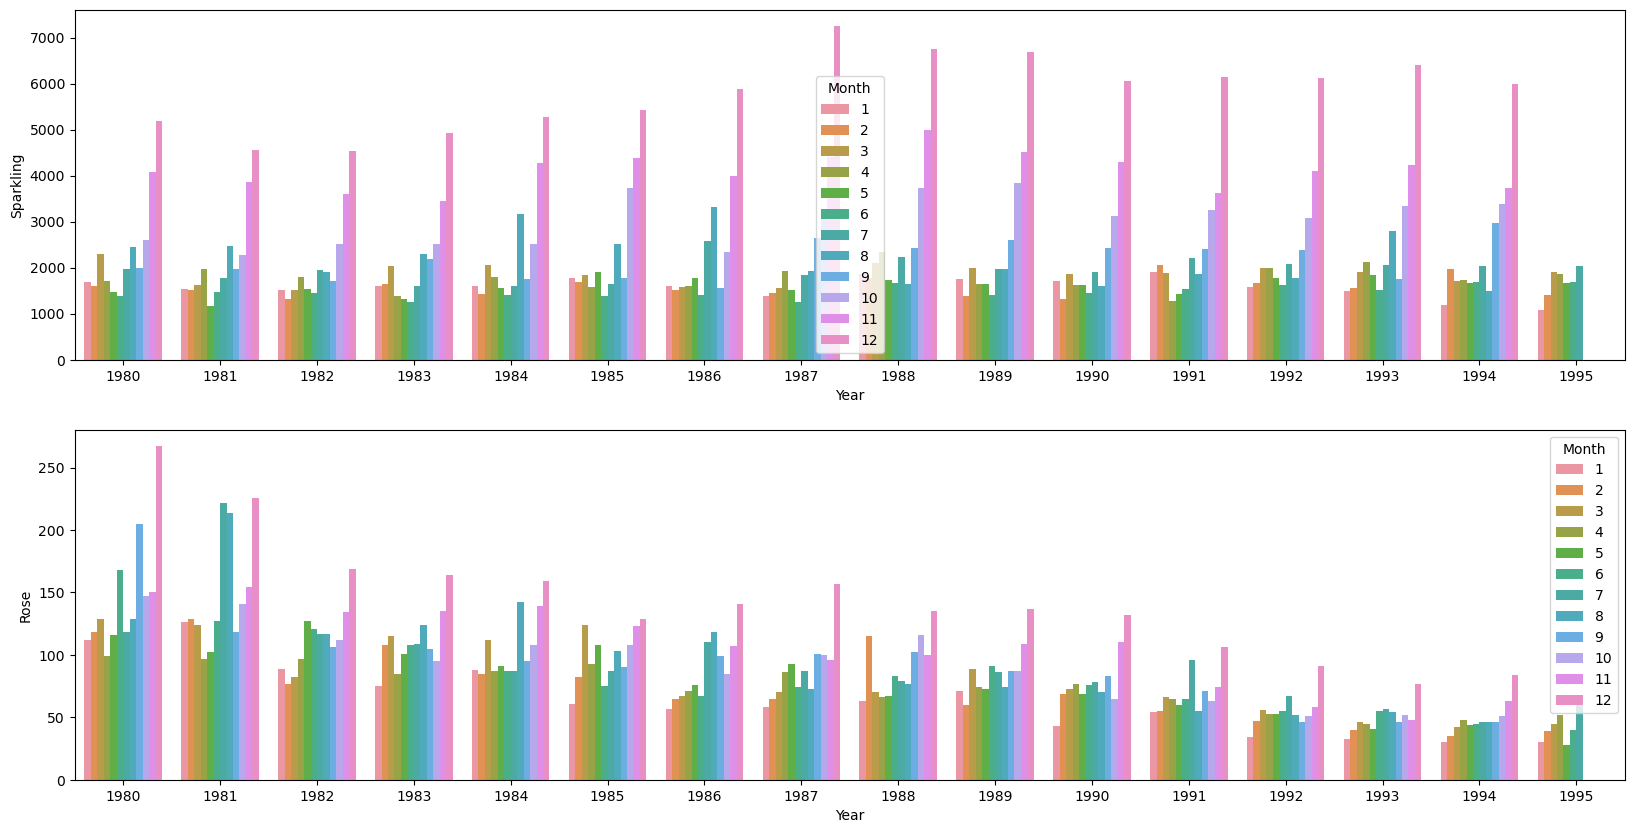

In [9]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,1,1)
sns.barplot(x = sparkling_df1['Year'],y = sparkling_df1['Sparkling'], hue = sparkling_df1['Month'], ax= ax1, )
ax2 = plt.subplot(2,1,2)
sns.barplot(x = rose_df1['Year'], y = rose_df1['Rose'], hue= rose_df1['Month'], ax = ax2)
plt.show()

In [10]:
display("Sparkling:", sparkling_df1.pivot_table(values = 'Sparkling', index = 'Year', aggfunc = 'mean', columns = 'Month'))
display("Rose:", rose_df1.pivot_table(values = 'Rose', index = 'Year', aggfunc = 'mean', columns = 'Month'))

'Sparkling:'

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


'Rose:'

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


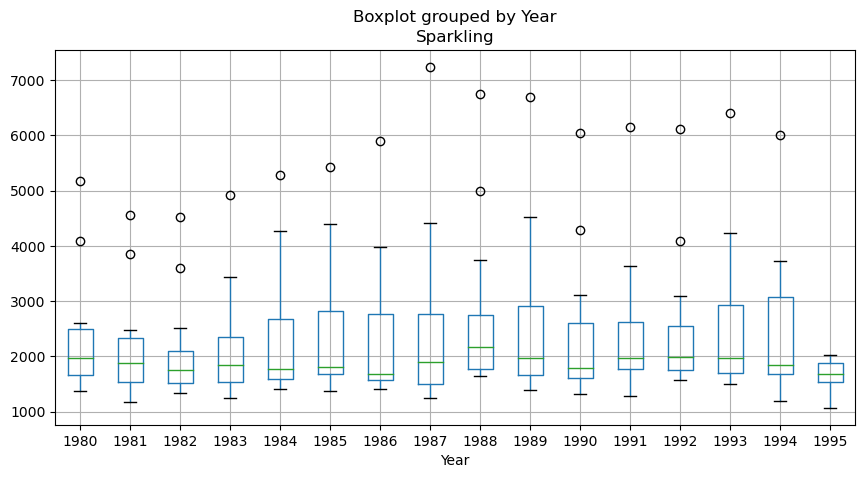

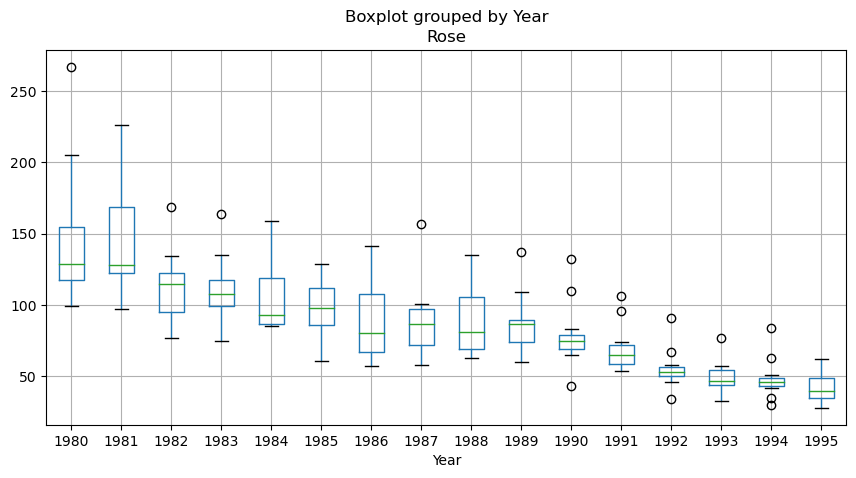

In [11]:
ax = sparkling_df1.boxplot('Sparkling', by = 'Year')
ax1 = rose_df1.boxplot('Rose', by = 'Year')
plt.show()

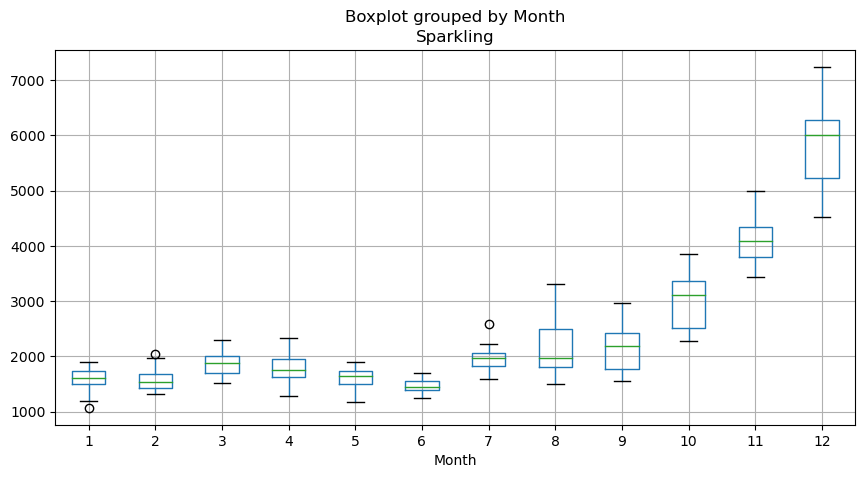

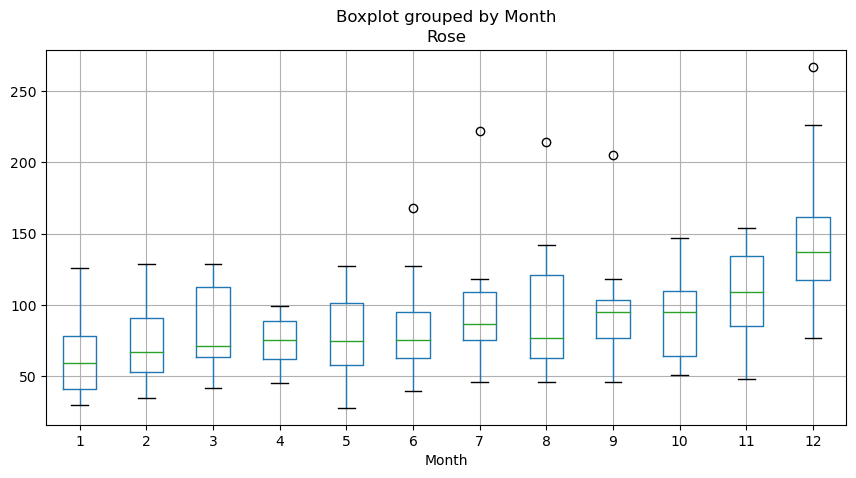

In [12]:
ax = sparkling_df1.boxplot('Sparkling', by = 'Month')
ax1 = rose_df1.boxplot('Rose', by = 'Month')
plt.show()

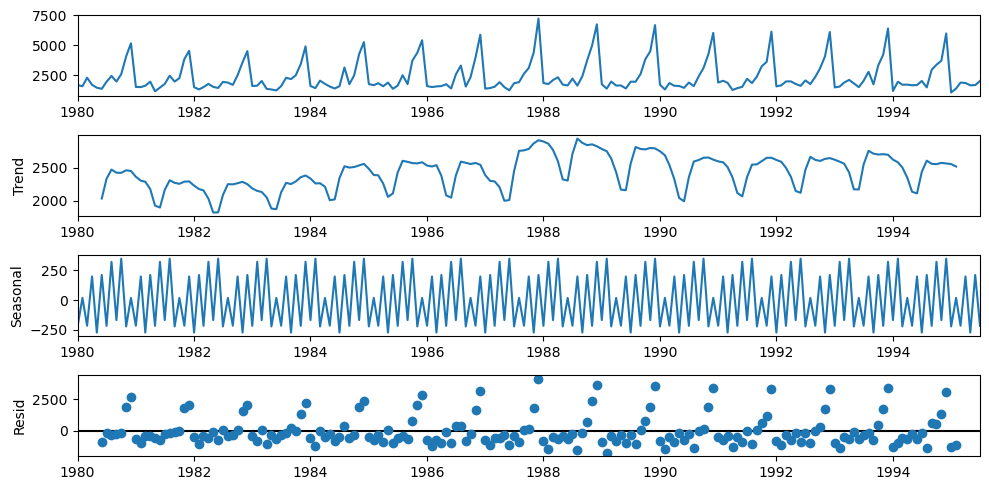

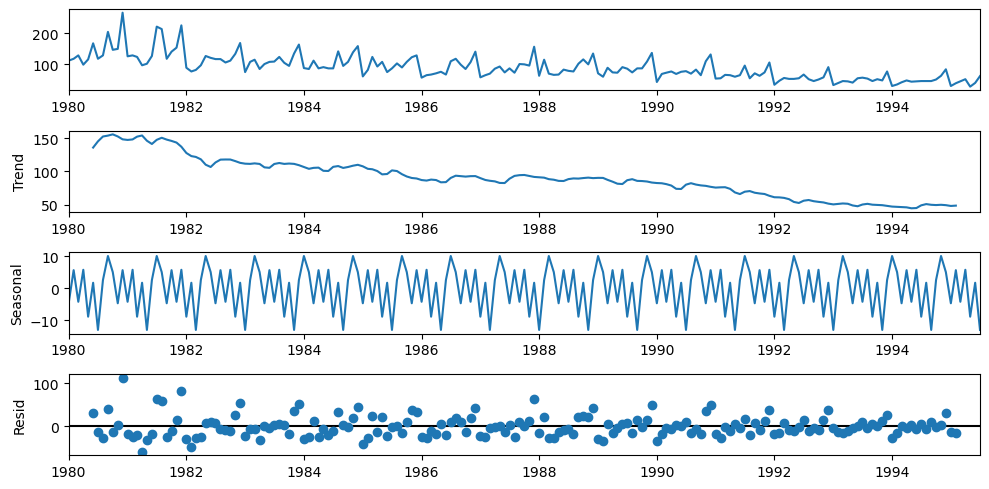

In [13]:
decompose_sparkling = seasonal_decompose(sparkling_df, model = 'additive', period = 10)
decompose_rose = seasonal_decompose(rose_df, model = 'additive', period = 10)

ax = decompose_sparkling.plot()
ax1 = decompose_rose.plot()

In [14]:
train_sparkling = sparkling_df1[sparkling_df1['Year'] < 1991]
test_sparkling = sparkling_df1[sparkling_df1['Year'] > 1990]
train_rose = rose_df1[rose_df1['Year'] < 1991]
test_rose = rose_df1[rose_df1['Year'] > 1990]

display(train_sparkling.tail())
print("Train Data:", train_sparkling.shape)
display(test_sparkling.head())
print("Test Data:", test_sparkling.shape)

display(train_rose.tail())
print("Train Data:", train_rose.shape)
display(test_rose.head())
print("Test Data:", test_rose.shape)

,Sparkling,Year,Month
YearMonth,,,
1990-08-01,1605,1990,8
1990-09-01,2424,1990,9
1990-10-01,3116,1990,10
1990-11-01,4286,1990,11
1990-12-01,6047,1990,12


Train Data: (132, 3)


,Sparkling,Year,Month
YearMonth,,,
1991-01-01,1902,1991,1
1991-02-01,2049,1991,2
1991-03-01,1874,1991,3
1991-04-01,1279,1991,4
1991-05-01,1432,1991,5


Test Data: (55, 3)


,Rose,Year,Month
YearMonth,,,
1990-08-01,70.0,1990,8
1990-09-01,83.0,1990,9
1990-10-01,65.0,1990,10
1990-11-01,110.0,1990,11
1990-12-01,132.0,1990,12


Train Data: (132, 3)


,Rose,Year,Month
YearMonth,,,
1991-01-01,54.0,1991,1
1991-02-01,55.0,1991,2
1991-03-01,66.0,1991,3
1991-04-01,65.0,1991,4
1991-05-01,60.0,1991,5


Test Data: (55, 3)


In [15]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [16]:
train_sparkling.shape

(132, 3)

In [17]:
LR_train_sparkling = train_sparkling.copy()
LR_test_sparkling = test_sparkling.copy()

LR_train_sparkling['time'] = train_time
LR_test_sparkling['time'] = test_time

display(LR_train_sparkling.head())
display(LR_test_sparkling.head())

,Sparkling,Year,Month,time
YearMonth,,,,
1980-01-01,1686,1980,1,1
1980-02-01,1591,1980,2,2
1980-03-01,2304,1980,3,3
1980-04-01,1712,1980,4,4
1980-05-01,1471,1980,5,5


,Sparkling,Year,Month,time
YearMonth,,,,
1991-01-01,1902,1991,1,133
1991-02-01,2049,1991,2,134
1991-03-01,1874,1991,3,135
1991-04-01,1279,1991,4,136
1991-05-01,1432,1991,5,137


In [18]:
train_time1 = [i+1 for i in range(len(train_rose))]
test_time1 = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [19]:
LR_train_rose = train_rose.copy()
LR_test_rose = test_rose.copy()

LR_train_rose['time'] = train_time
LR_test_rose['time'] = test_time

display(LR_train_rose.head())
display(LR_test_rose.head())

,Rose,Year,Month,time
YearMonth,,,,
1980-01-01,112.0,1980,1,1
1980-02-01,118.0,1980,2,2
1980-03-01,129.0,1980,3,3
1980-04-01,99.0,1980,4,4
1980-05-01,116.0,1980,5,5


,Rose,Year,Month,time
YearMonth,,,,
1991-01-01,54.0,1991,1,133
1991-02-01,55.0,1991,2,134
1991-03-01,66.0,1991,3,135
1991-04-01,65.0,1991,4,136
1991-05-01,60.0,1991,5,137


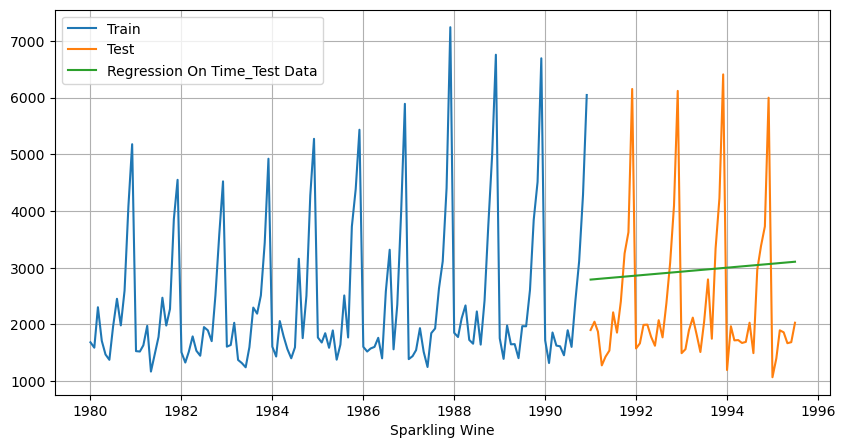

In [20]:
lr_spark = LinearRegression()
lr_spark.fit(LR_train_sparkling[['time']], LR_train_sparkling['Sparkling'])

test_predictions_model1 = lr_spark.predict(LR_test_sparkling[['time']])
LR_test_sparkling['Reg_sparkling'] = test_predictions_model1

plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LR_test_sparkling['Reg_sparkling'], label='Regression On Time_Test Data')
plt.xlabel("Sparkling Wine")
plt.legend(loc='best')
plt.grid()

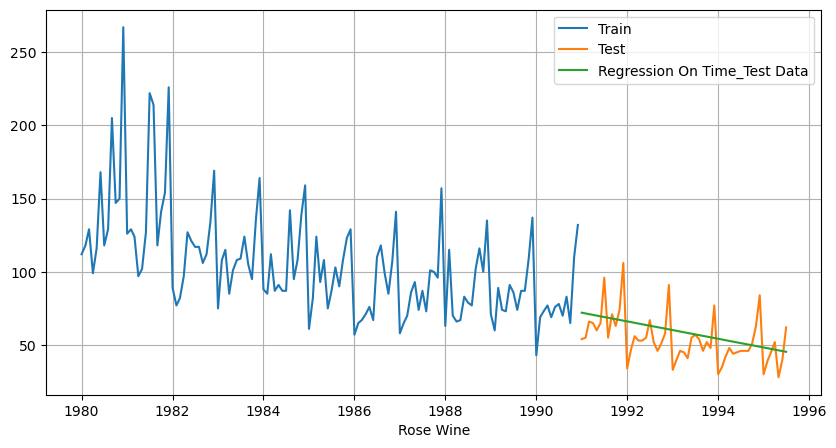

In [21]:
lr_rose = LinearRegression()
lr_rose.fit(LR_train_rose[['time']], LR_train_rose['Rose'])

test_predictions_model11 = lr_rose.predict(LR_test_rose[['time']])
LR_test_rose['Reg_rose'] = test_predictions_model11

plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LR_test_rose['Reg_rose'], label='Regression On Time_Test Data')
plt.xlabel("Rose Wine")
plt.legend(loc='best')
plt.grid()

In [22]:
rmse_model1_test = metrics.mean_squared_error(LR_test_sparkling['Sparkling'],test_predictions_model1,squared=False)

rmse_model11_test = metrics.mean_squared_error(LR_test_rose['Rose'],test_predictions_model11,squared=False)

Spark_resultsDf = pd.DataFrame({'Test_Spark RMSE': [rmse_model1_test]},index=['Regression'])
Rose_resultsDf = pd.DataFrame({'Test_Rose RMSE': [rmse_model11_test]},index=['Regression'])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175


,Test_Rose RMSE
Regression,15.262509


In [23]:
Naive_train_sparkling = train_sparkling.copy()
Naive_test_sparkling = test_sparkling.copy()

Naive_train_rose = train_rose.copy()
Naive_test_rose = test_rose.copy()

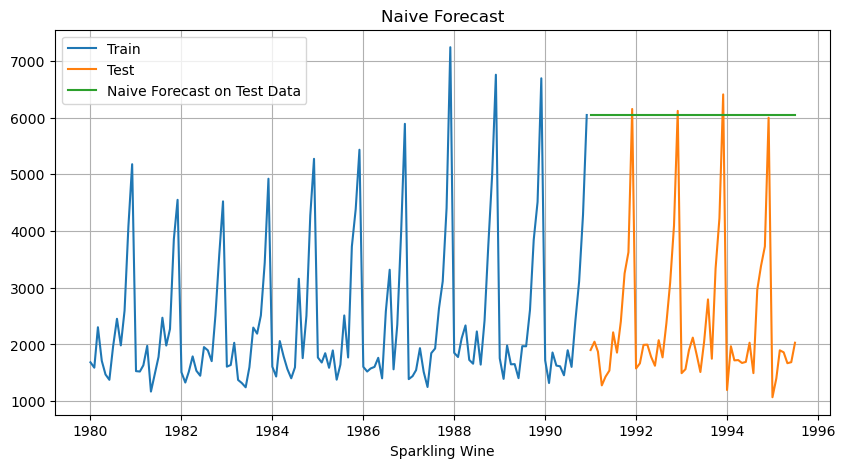

In [24]:
Naive_test_sparkling['naive'] = np.asarray(Naive_train_sparkling['Sparkling'])[len(np.asarray(Naive_train_sparkling['Sparkling']))-1]

plt.figure(figsize=(10,5))
plt.plot(Naive_train_sparkling['Sparkling'], label='Train')
plt.plot(Naive_test_sparkling['Sparkling'], label='Test')
plt.plot(Naive_test_sparkling['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Naive Forecast")
plt.grid()

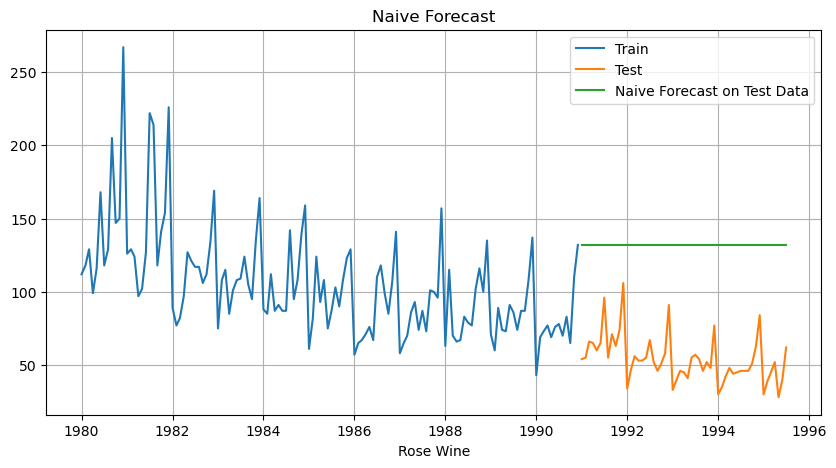

In [25]:
Naive_test_rose['naive'] = np.asarray(Naive_train_rose['Rose'])[len(np.asarray(Naive_train_rose['Rose']))-1]

plt.figure(figsize=(10,5))
plt.plot(Naive_train_rose['Rose'], label='Train')
plt.plot(Naive_test_rose['Rose'], label='Test')
plt.plot(Naive_test_rose['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Naive Forecast")
plt.grid()

In [26]:
rmse_model2_test = metrics.mean_squared_error(Naive_test_sparkling['Sparkling'],Naive_test_sparkling['naive'],squared=False)

rmse_model22_test = metrics.mean_squared_error(Naive_test_rose['Rose'],Naive_test_rose['naive'],squared=False)

Spark_resultsDf_2 = pd.DataFrame({'Test_Spark RMSE': [rmse_model2_test]},index=['NaiveModel'])
Rose_resultsDf2 = pd.DataFrame({'Test_Rose RMSE': [rmse_model22_test]},index=['NaiveModel'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf_2])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf2])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093


In [27]:
SimpleAvg_train_sparkling = train_sparkling.copy()
SimpleAvg_test_sparkling = test_sparkling.copy()

SimpleAvg_train_rose = train_rose.copy()
SimpleAvg_test_rose = test_rose.copy()

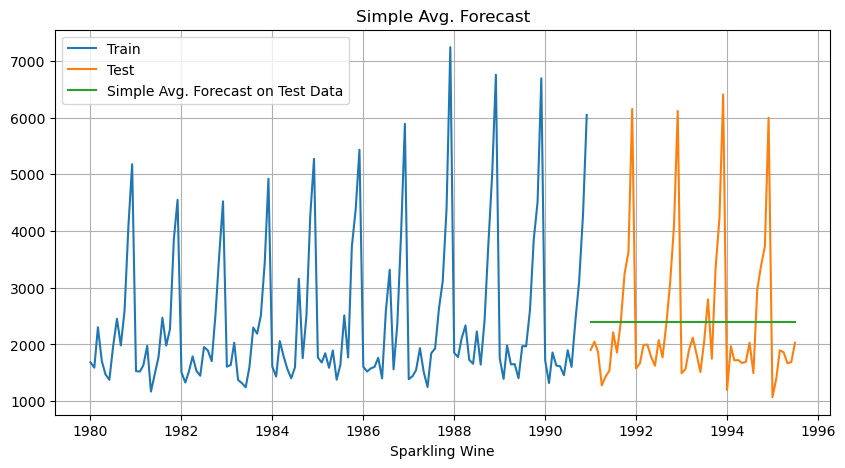

In [28]:
SimpleAvg_test_sparkling['Mean Forecast'] = SimpleAvg_train_sparkling['Sparkling'].mean()
SimpleAvg_test_rose['Mean Forecast'] = SimpleAvg_train_rose['Rose'].mean()

plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAvg_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAvg_test_sparkling['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Simple Avg. Forecast")
plt.grid()

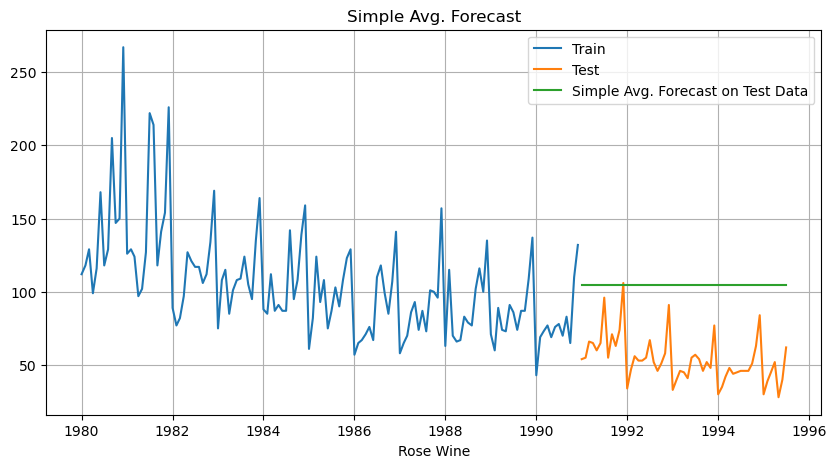

In [29]:
plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_rose['Rose'], label='Train')
plt.plot(SimpleAvg_test_rose['Rose'], label='Test')
plt.plot(SimpleAvg_test_rose['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Simple Avg. Forecast")
plt.grid()

In [30]:
rmse_model3_test = metrics.mean_squared_error(SimpleAvg_test_sparkling['Sparkling'],SimpleAvg_test_sparkling['Mean Forecast'],squared=False)

rmse_model33_test = metrics.mean_squared_error(SimpleAvg_test_rose['Rose'],SimpleAvg_test_rose['Mean Forecast'],squared=False)

Spark_resultsDf3 = pd.DataFrame({'Test_Spark RMSE': [rmse_model3_test]},index=['SimpleAvg'])
Rose_resultsDf3 = pd.DataFrame({'Test_Rose RMSE': [rmse_model33_test]},index=['SimpleAvg'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf3])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf3])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426


In [31]:
MA_sparkling = sparkling_df1.copy()
MA_sparkling['Trailing_2'] = MA_sparkling['Sparkling'].rolling(2).mean()
MA_sparkling['Trailing_4'] = MA_sparkling['Sparkling'].rolling(4).mean()
MA_sparkling['Trailing_6'] = MA_sparkling['Sparkling'].rolling(6).mean()
MA_sparkling['Trailing_9'] = MA_sparkling['Sparkling'].rolling(9).mean()

MA_sparkling.head(10)

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1980,6,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1980,7,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,1980,8,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,1980,9,2218.5,1945.00,1827.166667,1838.222222


In [32]:
MA_rose = rose_df1.copy()
MA_rose['Trailing_2'] = MA_rose['Rose'].rolling(2).mean()
MA_rose['Trailing_4'] = MA_rose['Rose'].rolling(4).mean()
MA_rose['Trailing_6'] = MA_rose['Rose'].rolling(6).mean()
MA_rose['Trailing_9'] = MA_rose['Rose'].rolling(9).mean()

MA_rose.head(10)

,Rose,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,112.0,1980,1,NaN,NaN,NaN,NaN
1980-02-01,118.0,1980,2,115.0,NaN,NaN,NaN
1980-03-01,129.0,1980,3,123.5,NaN,NaN,NaN
1980-04-01,99.0,1980,4,114.0,114.50,NaN,NaN
1980-05-01,116.0,1980,5,107.5,115.50,NaN,NaN
1980-06-01,168.0,1980,6,142.0,128.00,123.666667,NaN
1980-07-01,118.0,1980,7,143.0,125.25,124.666667,NaN
1980-08-01,129.0,1980,8,123.5,132.75,126.500000,NaN
1980-09-01,205.0,1980,9,167.0,155.00,139.166667,132.666667


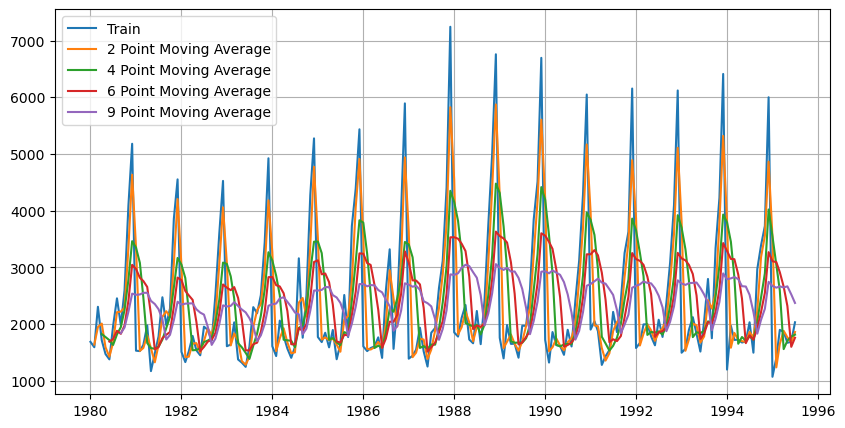

In [33]:
plt.figure(figsize=(10,5))
plt.plot(MA_sparkling['Sparkling'], label='Train')
plt.plot(MA_sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_sparkling['Trailing_6'], label='6 Point Moving Average')
plt.plot(MA_sparkling['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()

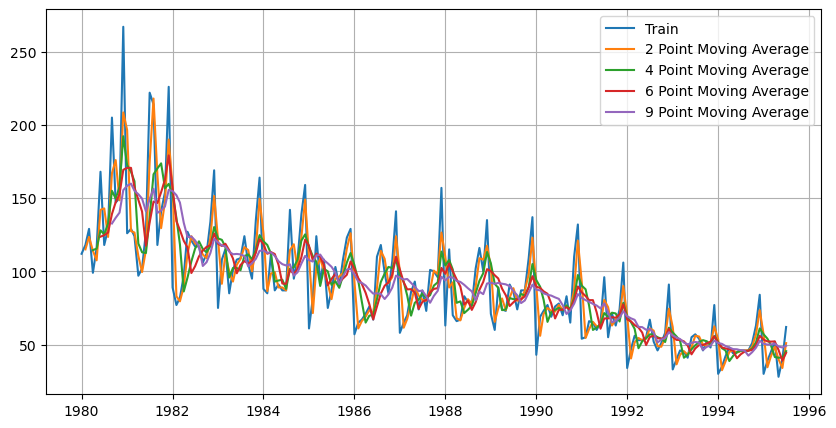

In [34]:
plt.figure(figsize=(10,5))
plt.plot(MA_rose['Rose'], label='Train')
plt.plot(MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_rose['Trailing_6'], label='6 Point Moving Average')
plt.plot(MA_rose['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()

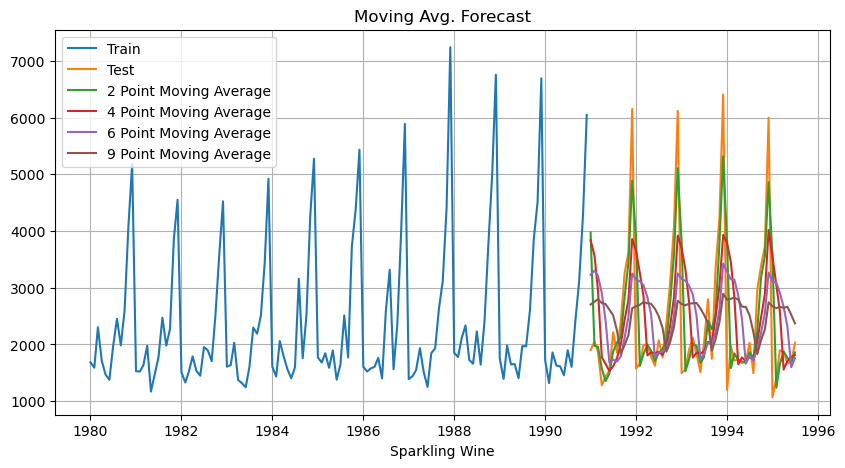

In [35]:
train_MA_spark = MA_sparkling[MA_sparkling['Year'] <1991]
test_MA_spark = MA_sparkling[MA_sparkling['Year'] >1990]

plt.figure(figsize=(10,5))
plt.plot(train_MA_spark['Sparkling'], label='Train')
plt.plot(test_MA_spark['Sparkling'], label='Test')
plt.plot(test_MA_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_spark['Trailing_6'], label='6 Point Moving Average')
plt.plot(test_MA_spark['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Sparkling Wine")
plt.title("Moving Avg. Forecast")
plt.grid()

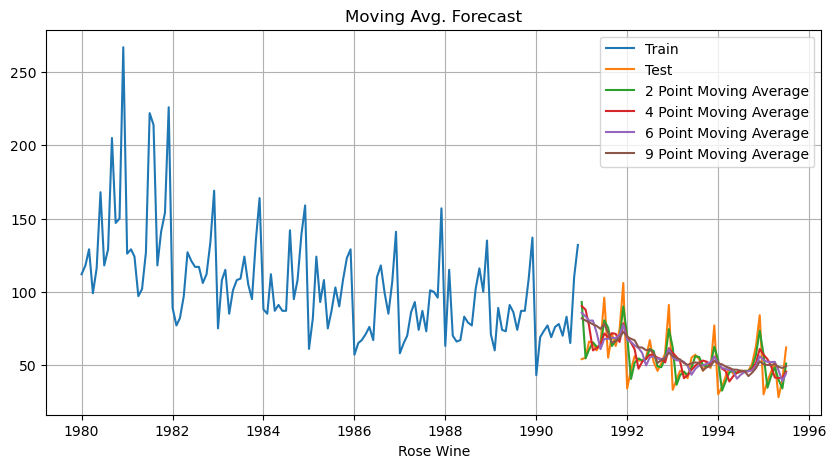

In [36]:
train_MA_rose = MA_rose[MA_rose['Year'] <1991]
test_MA_rose = MA_rose[MA_rose['Year'] >1990]

plt.figure(figsize=(10,5))
plt.plot(train_MA_rose['Rose'], label='Train')
plt.plot(test_MA_rose['Rose'], label='Test')
plt.plot(test_MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_rose['Trailing_6'], label='6 Point Moving Average')
plt.plot(test_MA_rose['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Rose Wine")
plt.title("Moving Avg. Forecast")
plt.grid()

In [37]:
rmse_model4_test_2 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_2'],squared=False)
rmse_model4_test_4 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_4'],squared=False)
rmse_model4_test_6 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_6'],squared=False)
rmse_model4_test_9 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_9'],squared=False)

rmse_model44_test_2 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_2'],squared=False)
rmse_model44_test_4 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_4'],squared=False)
rmse_model44_test_6 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_6'],squared=False)
rmse_model44_test_9 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_9'],squared=False)

Spark_resultsDf4 = pd.DataFrame({'Test_Spark RMSE': [rmse_model4_test_2,rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                               index =['MovingAvg2', 'MovingAvg4', 'MovingAvg6', 'MovingAvg9'])
Rose_resultsDf4 = pd.DataFrame({'Test_Rose RMSE': [rmse_model44_test_2,rmse_model44_test_4, rmse_model44_test_6, rmse_model44_test_9]},
                               index =['MovingAvg2', 'MovingAvg4', 'MovingAvg6', 'MovingAvg9'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf4])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf4])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503


In [38]:
SES_train_sparkling = train_sparkling.copy()
SES_test_sparkling = test_sparkling.copy()

SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [39]:
model_SES_spark = SimpleExpSmoothing(SES_train_sparkling['Sparkling'])
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)
display(model_SES_autofit_spark.params)

SES_predict_spark = model_SES_autofit_spark.forecast(steps=len(SES_test_sparkling))

model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)
display(model_SES_autofit_rose.params)

SES_predict_rose = model_SES_autofit_rose.forecast(steps=len(SES_test_rose))

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Text(0.5, 1.0, 'Alpha = 0.0 Predictions')

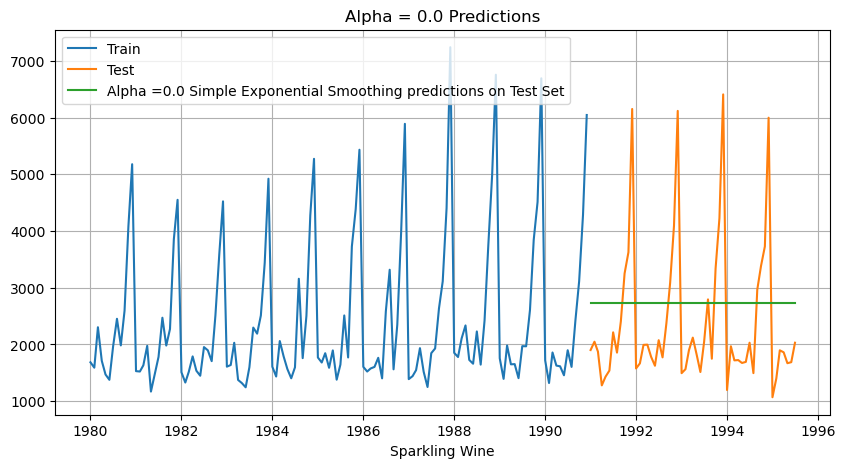

In [40]:
plt.figure(figsize=(10,5))
plt.plot(SES_train_sparkling['Sparkling'], label='Train')
plt.plot(SES_test_sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.grid()
plt.title('Alpha = 0.0 Predictions')

Text(0.5, 1.0, 'Alpha = 0.09 Predictions')

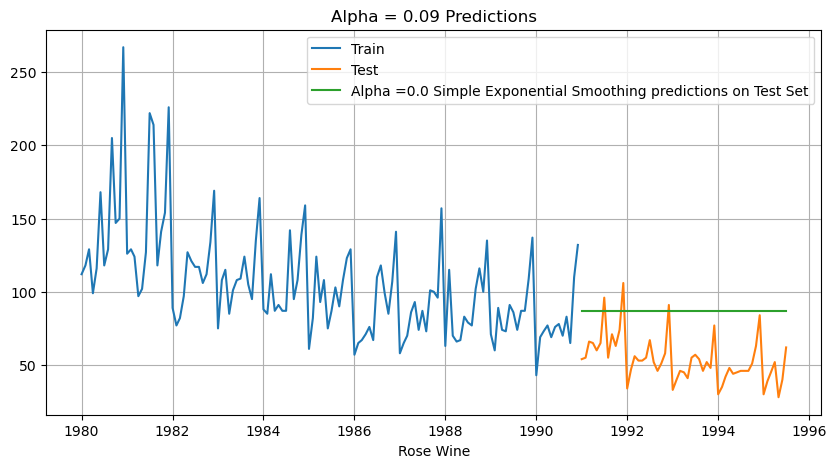

In [41]:
plt.figure(figsize=(10,5))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.grid()
plt.title('Alpha = 0.09 Predictions')

In [42]:
rmse_model5_test = metrics.mean_squared_error(SES_predict_spark, SES_test_sparkling['Sparkling'],squared=False)

rmse_model55_test = metrics.mean_squared_error(SES_predict_rose, SES_test_rose['Rose'],squared=False)

Spark_resultsDf5 = pd.DataFrame({'Test_Spark RMSE': [rmse_model5_test]},index=['SES'])
Rose_resultsDf5 = pd.DataFrame({'Test_Rose RMSE': [rmse_model55_test]},index=['SES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf5])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf5])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774


In [43]:
DES_train_sparkling = train_sparkling.copy()
DES_test_sparkling = test_sparkling.copy()

DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [44]:
model_DES_spark = Holt(DES_train_sparkling['Sparkling'])
model_DES_autofit_spark = model_DES_spark.fit(optimized=True)
display(model_DES_autofit_spark.params)

DES_predict_spark = model_DES_autofit_spark.forecast(steps=len(DES_test_sparkling))

model_DES_rose = Holt(DES_train_rose['Rose'])
model_DES_autofit_rose = model_DES_rose.fit(optimized=True)
display(model_DES_autofit_rose.params)

DES_predict_rose = model_DES_autofit_spark.forecast(steps=len(DES_test_sparkling))

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

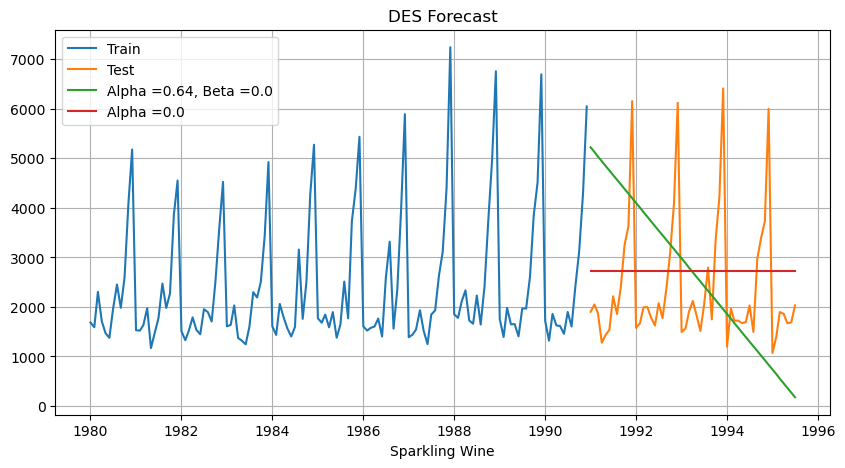

In [45]:
plt.figure(figsize=(10,5))
plt.plot(DES_train_sparkling['Sparkling'], label='Train')
plt.plot(DES_test_sparkling['Sparkling'], label='Test')
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta =0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("DES Forecast")
plt.grid()

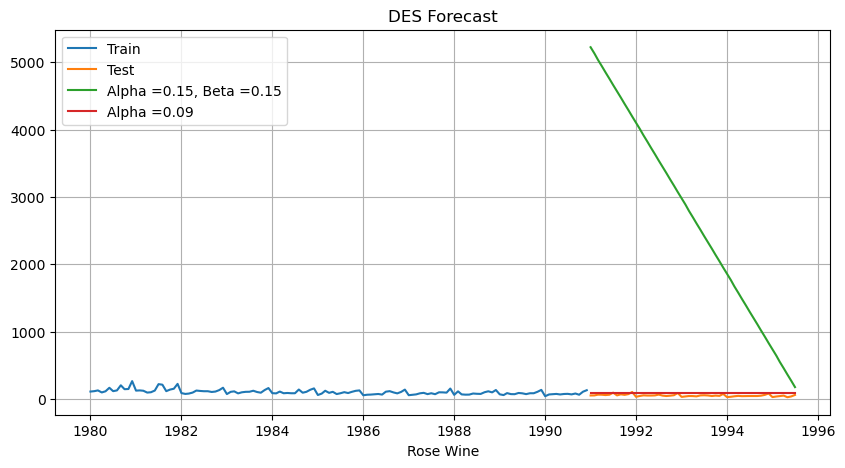

In [46]:
plt.figure(figsize=(10,5))
plt.plot(DES_train_rose['Rose'], label='Train')
plt.plot(DES_test_rose['Rose'], label='Test')
plt.plot(DES_predict_rose, label='Alpha =0.15, Beta =0.15')
plt.plot(SES_predict_rose, label='Alpha =0.09')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("DES Forecast")
plt.grid()

In [47]:
rmse_model6_test = metrics.mean_squared_error(DES_predict_spark, DES_test_sparkling['Sparkling'],squared=False)

rmse_model66_test = metrics.mean_squared_error(DES_predict_rose, DES_test_rose['Rose'],squared=False) 

Spark_resultsDf6 = pd.DataFrame({'Test_Spark RMSE': [rmse_model6_test]}, index=['DES'])
Rose_resultsDf66 = pd.DataFrame({'Test_Rose RMSE': [rmse_model66_test]}, index=['DES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf6])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf66])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011


In [48]:
TES_train_sparkling = train_sparkling.copy()
TES_test_sparkling = test_sparkling.copy()

TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [49]:
model_TES_spark = ExponentialSmoothing(TES_train_sparkling['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark = model_TES_spark.fit(optimized=True)
display(model_TES_autofit_spark.params)

TES_predict_spark = model_TES_autofit_spark.forecast(steps=len(TES_test_sparkling))

model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'], trend='additive', seasonal='multiplicative')
model_TES_autofit_rose = model_TES_rose.fit(optimized=True)
display(model_TES_autofit_rose.params)

TES_predict_rose = model_TES_autofit_rose.forecast(steps=len(TES_test_rose))

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

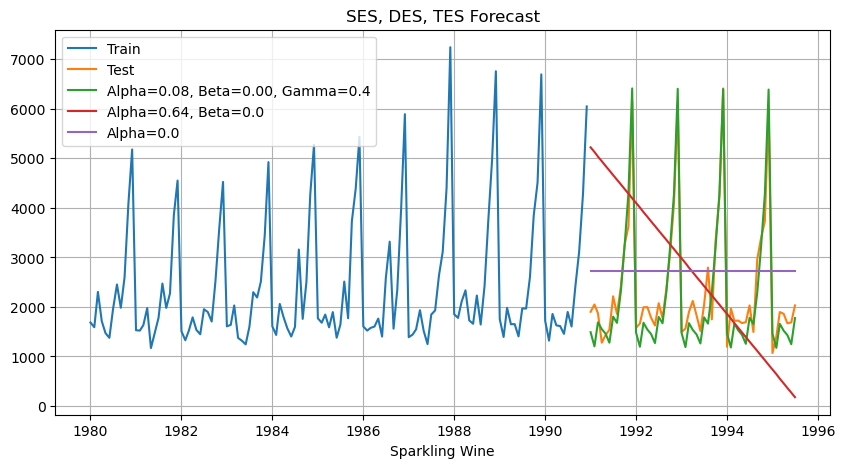

In [50]:
plt.figure(figsize=(10,5))
plt.plot(TES_train_sparkling['Sparkling'], label='Train')
plt.plot(TES_test_sparkling['Sparkling'], label='Test')
plt.plot(TES_predict_spark, label='Alpha=0.08, Beta=0.00, Gamma=0.4')
plt.plot(DES_predict_spark, label='Alpha=0.64, Beta=0.0')
plt.plot(SES_predict_spark, label='Alpha=0.0')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

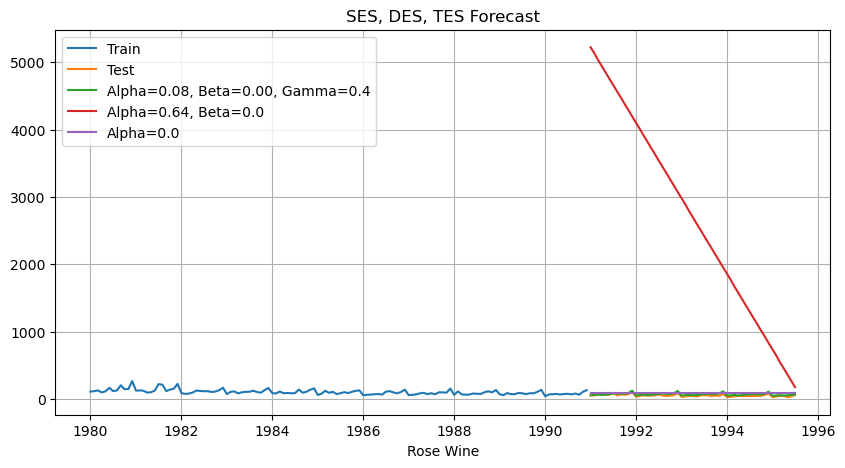

In [51]:
plt.figure(figsize=(10,5))
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')
plt.plot(TES_predict_rose, label='Alpha=0.08, Beta=0.00, Gamma=0.4')
plt.plot(DES_predict_rose, label='Alpha=0.64, Beta=0.0')
plt.plot(SES_predict_rose, label='Alpha=0.0')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()    

In [52]:
rmse_model0_test = metrics.mean_squared_error(TES_predict_spark, TES_test_sparkling['Sparkling'],squared=False)

rmse_model00_test = metrics.mean_squared_error(TES_predict_rose, TES_test_rose['Rose'],squared=False) 

Spark_resultsDf0 = pd.DataFrame({'Test_Spark RMSE': [rmse_model0_test]}, index=['TES'])
Rose_resultsDf00 = pd.DataFrame({'Test_Rose RMSE': [rmse_model00_test]}, index=['TES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf0])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf00])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011
TES,20.132468


In [53]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sparkling_df)

print('DF test statistic for Sparkling dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

dftest = adfuller(rose_df)

print('DF test ststistic for Rose dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic for Sparkling dataset -1.360
DF test p-value is 0.6011
DF test ststistic for Rose dataset -1.877
DF test p-value is 0.3427


In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results for Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Sparkling Train$Test:



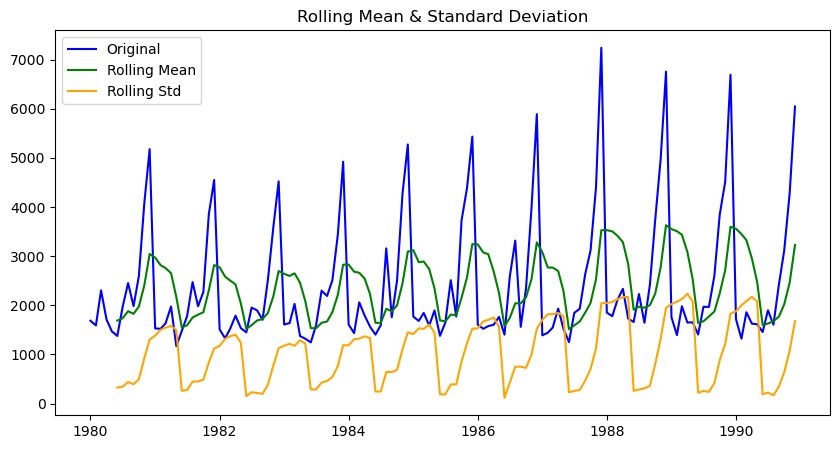

Results for Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



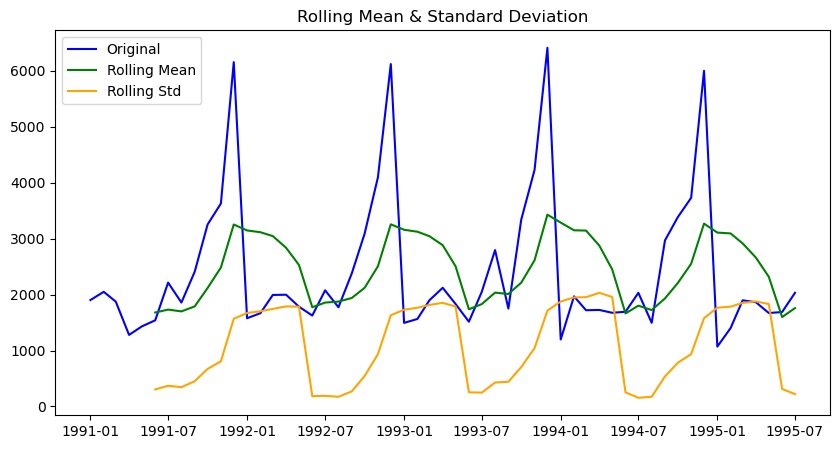

Results for Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [55]:
print("Sparkling Train$Test:\n")
ax = test_stationarity(train_sparkling['Sparkling'])
ax1 = test_stationarity(test_sparkling['Sparkling'])

Rose Train$Test:



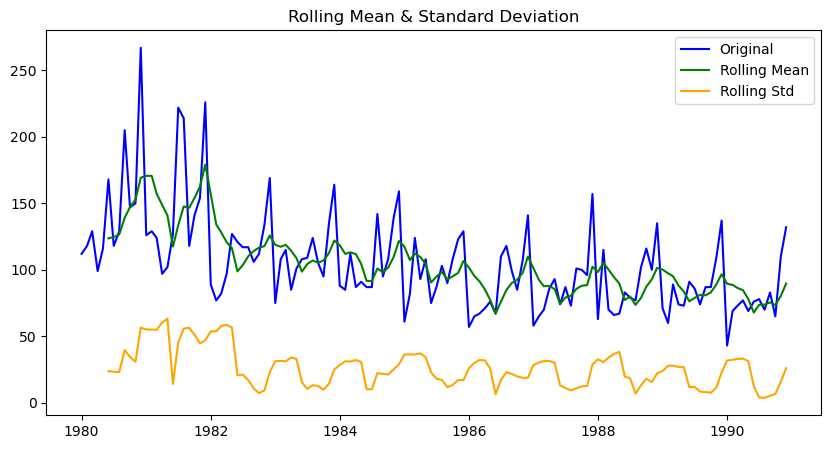

Results for Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



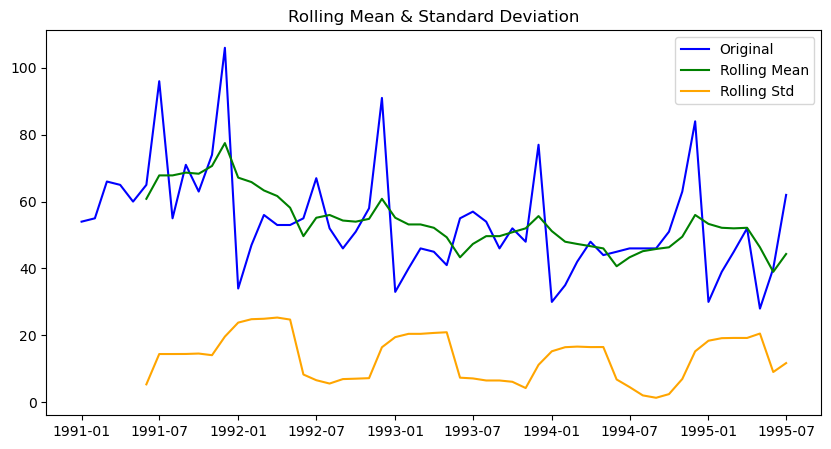

Results for Dickey-Fuller Test:
Test Statistic                 -4.464772
p-value                         0.000228
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [56]:
print("Rose Train$Test:\n")
ax = test_stationarity(train_rose['Rose'])
ax1 = test_stationarity(test_rose['Rose'])

Differenced Sparkling Data:



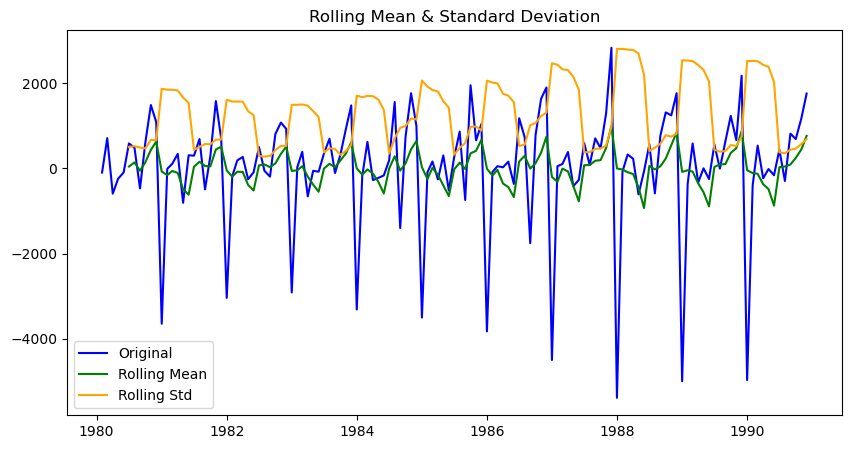

Results for Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



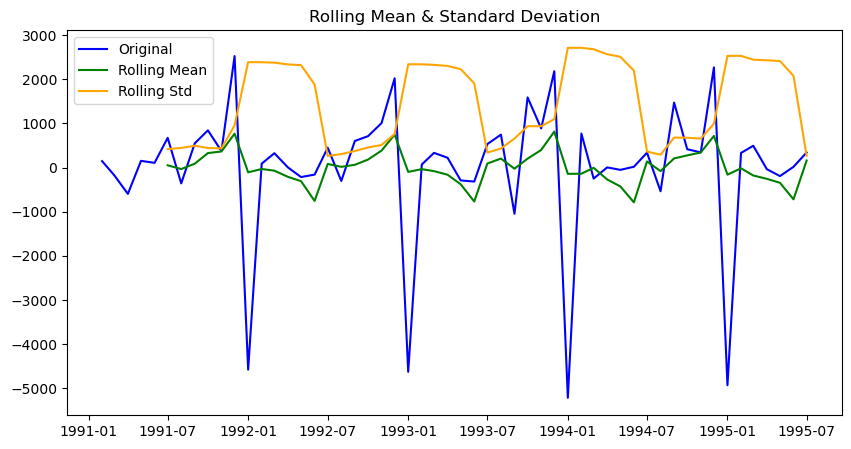

Results for Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [57]:
print("Differenced Sparkling Data:\n")
ax = test_stationarity((train_sparkling['Sparkling']).diff().dropna())
ax1 = test_stationarity((test_sparkling['Sparkling']).diff().dropna())

Differenced Rose Data:



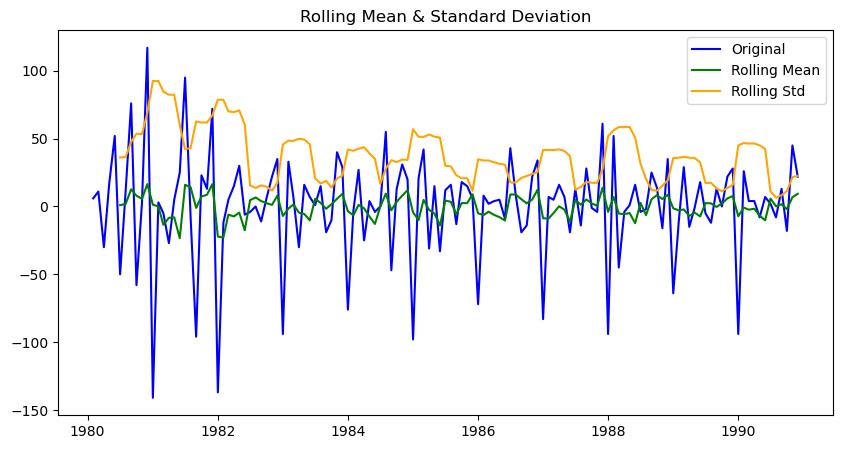

Results for Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [58]:
print("Differenced Rose Data:\n")
ax = test_stationarity((train_rose['Rose']).diff().dropna())

In [59]:
import itertools
p = q = range(0,3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [60]:
ARIMA_AIC_sp = pd.DataFrame(columns=['param', 'AIC_Sparkling'])
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model_s = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    ARIMA_AIC_sp = ARIMA_AIC_sp.append({'param':param, 'AIC_Sparkling': ARIMA_model_s.aic}, ignore_index=True)
    
display(ARIMA_AIC_sp.sort_values(by='AIC_Sparkling',ascending=True))

,param,AIC_Sparkling
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [61]:
ARIMA_AIC_ro = pd.DataFrame(columns=['param', 'AIC_Rose'])
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model_r = ARIMA(train_rose['Rose'].values,order=param).fit()
    ARIMA_AIC_ro = ARIMA_AIC_ro.append({'param':param, 'AIC_Rose': ARIMA_model_r.aic}, ignore_index=True)
    
display(ARIMA_AIC_ro.sort_values(by='AIC_Rose',ascending=True))

,param,AIC_Rose
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [62]:
from statsmodels.tsa.arima.model import ARIMA
auto_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(2,1,2))
results_auto_ARIMA_s = auto_ARIMA_s.fit()
print("Sparkling Data:\n", results_auto_ARIMA_s.summary())

Sparkling Data:
                                SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 07 Jul 2024   AIC                           2213.509
Time:                        14:22:51   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109   

In [63]:
auto_ARIMA_r = ARIMA((train_rose['Rose']).diff().dropna(), order=(0,1,2))
results_auto_ARIMA_r = auto_ARIMA_r.fit()
print("Rose Data:\n", results_auto_ARIMA_r.summary())

Rose Data:
                                SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -637.781
Date:                Sun, 07 Jul 2024   AIC                           1281.561
Time:                        14:22:51   BIC                           1290.164
Sample:                    02-01-1980   HQIC                          1285.057
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9931      0.452     -4.408      0.000      -2.879      -1.107
ma.L2          0.9965      0.453      2.201      0.028       0.109       1.884
sigma2       962.1823    421.444      2.

In [64]:
predicted_auto_ARIMA_s = results_auto_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_auto_ARIMA_r = results_auto_ARIMA_r.forecast(steps=len(test_rose))

rmse_model7_test = metrics.mean_squared_error(predicted_auto_ARIMA_s,test_sparkling['Sparkling'],squared=False)

rmse_model77_test = metrics.mean_squared_error(predicted_auto_ARIMA_r,test_rose['Rose'],squared=False)

Spark_resultsDf7 = pd.DataFrame({'Test_Spark RMSE': [rmse_model7_test]},index=[' Auto ARIMA (2,1,2)'])
Rose_resultsDf77 = pd.DataFrame({'Test_Rose RMSE': [rmse_model77_test]},index=['Auto ARIMA (0,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf7])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf77])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011
TES,20.132468


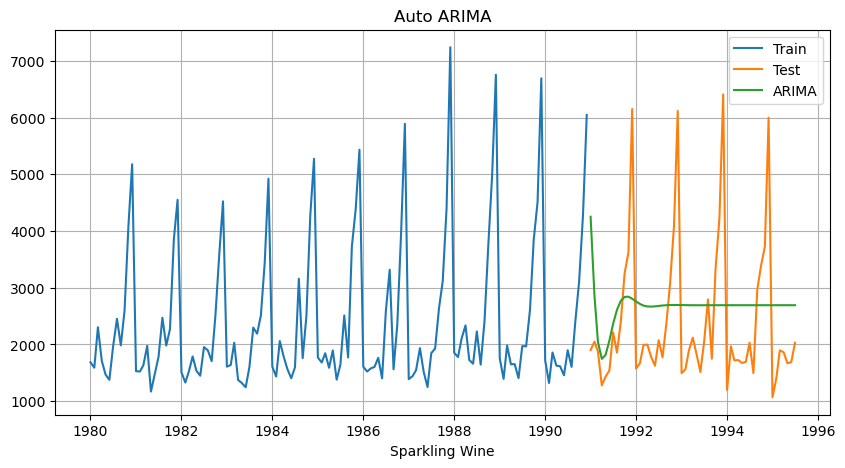

In [65]:
pred_ARIMA = pd.DataFrame({'Pred': predicted_auto_ARIMA_s}, index = test_sparkling.index)
plt.figure(figsize=(10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Auto ARIMA")
plt.grid()

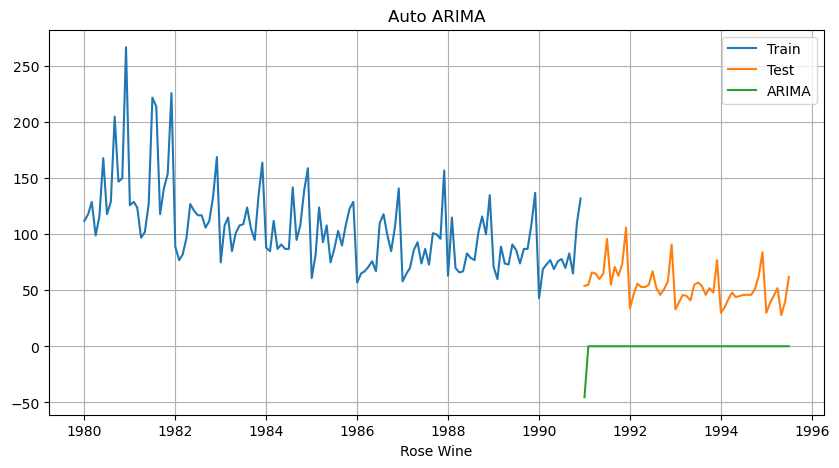

In [66]:
pred_ARIMA_Rose = pd.DataFrame({'Pred': predicted_auto_ARIMA_r}, index = test_rose.index)
plt.figure(figsize=(10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Auto ARIMA")
plt.grid()

<Figure size 1000x500 with 0 Axes>

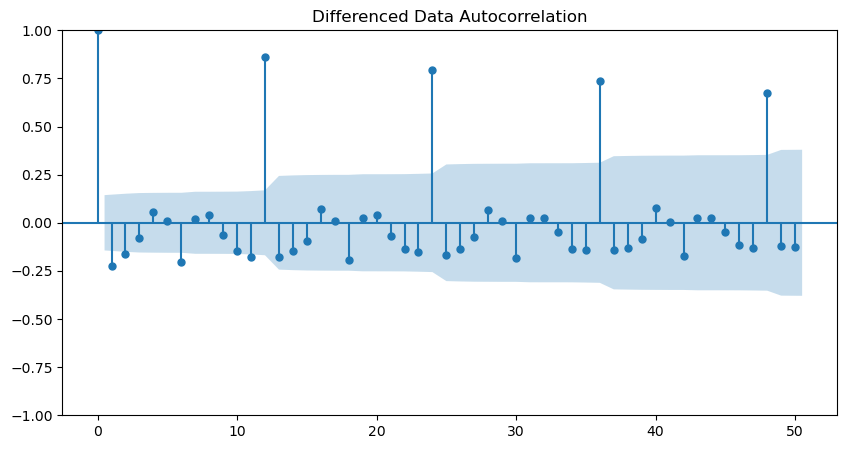

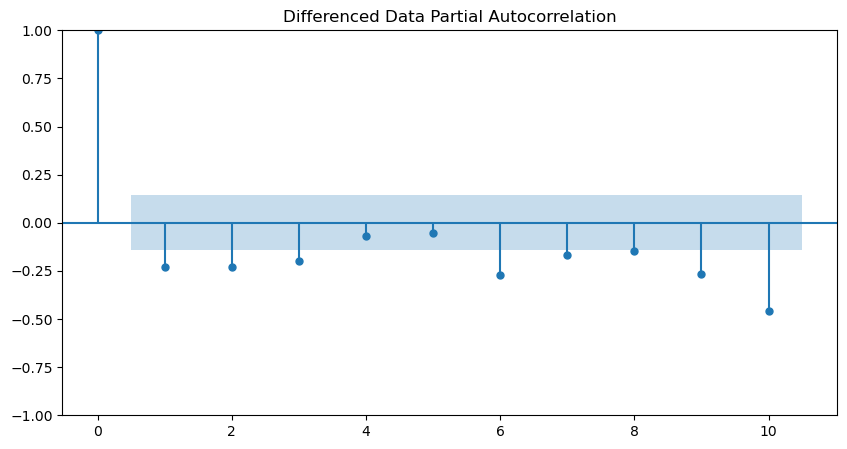

In [67]:
plt.figure(figsize=(10,5))
plot_acf(sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkling_df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

<Figure size 1000x500 with 0 Axes>

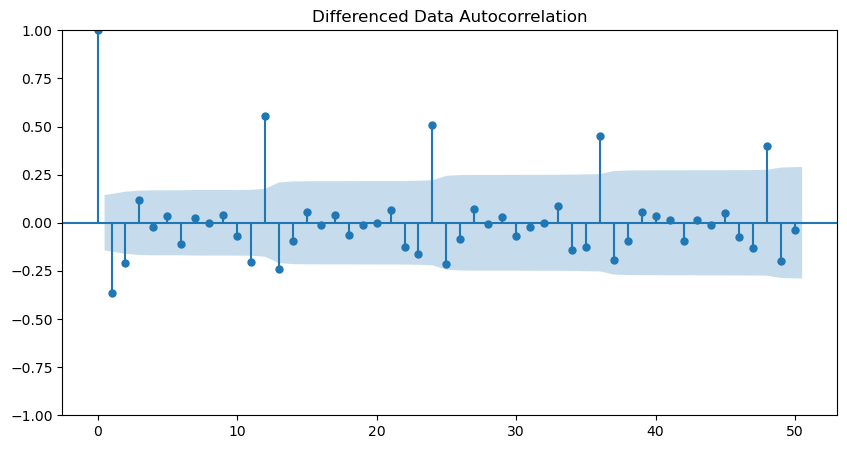

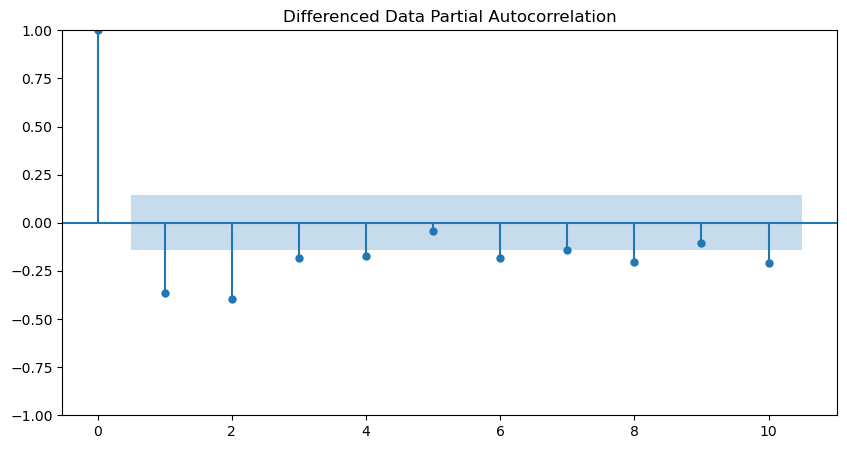

In [68]:
plt.figure(figsize=(10,5))
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose_df['Rose'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

In [69]:
manual_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(3,1,2))
results_manual_ARIMA_s = manual_ARIMA_s.fit()
print("Sparkling Data:\n", results_manual_ARIMA_s.summary())

Sparkling Data:
                                SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.390
Date:                Sun, 07 Jul 2024   AIC                           2230.781
Time:                        14:22:57   BIC                           2248.032
Sample:                    01-01-1980   HQIC                          2237.791
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4323      0.042    -10.219      0.000      -0.515      -0.349
ar.L2          0.3287      0.108      3.045      0.002       0.117       0.540
ar.L3         -0.2390      0.066   

In [70]:
manual_ARIMA_r = ARIMA(train_rose['Rose'], order=(3,1,2))
results_manual_ARIMA_r = manual_ARIMA_r.fit()
print("Rose Data:\n", results_manual_ARIMA_r.summary())

Rose Data:
                                SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -635.860
Date:                Sun, 07 Jul 2024   AIC                           1283.721
Time:                        14:22:58   BIC                           1300.972
Sample:                    01-01-1980   HQIC                          1290.731
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3929      0.517     -0.759      0.448      -1.407       0.621
ar.L2          0.0073      0.165      0.045      0.964      -0.316       0.331
ar.L3          0.0425      0.107      0.

In [71]:
predicted_manual_ARIMA_s = results_manual_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_manual_ARIMA_r = results_manual_ARIMA_r.forecast(steps=len(test_rose))

rmse_model8_test = metrics.mean_squared_error(predicted_manual_ARIMA_s,test_sparkling['Sparkling'],squared=False)

rmse_model88_test = metrics.mean_squared_error(predicted_manual_ARIMA_r,test_rose['Rose'],squared=False)

Spark_resultsDf8 = pd.DataFrame({'Test_Spark RMSE': [rmse_model8_test]},index=[' Manual ARIMA (3,1,2)'])
Rose_resultsDf88 = pd.DataFrame({'Test_Rose RMSE': [rmse_model88_test]},index=['Manual ARIMA (4,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf8])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf88])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011
TES,20.132468


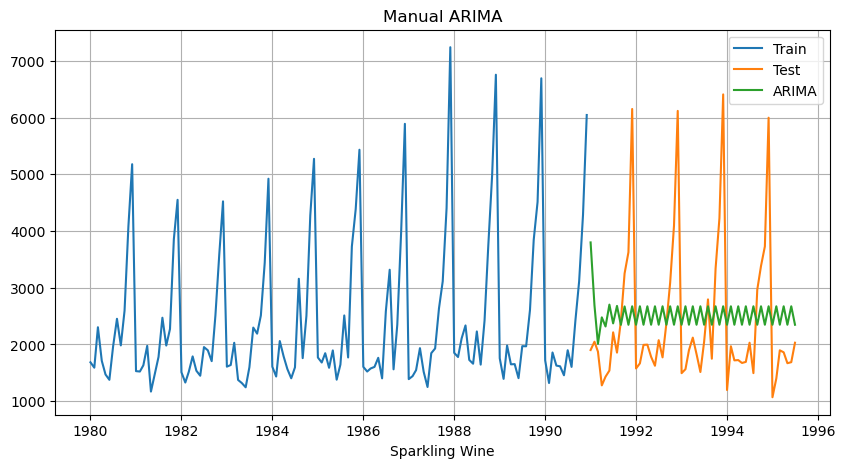

In [72]:
pred_ARIMA_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_s}, index = test_sparkling.index)
plt.figure(figsize=(10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA_manual, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Manual ARIMA")
plt.grid()

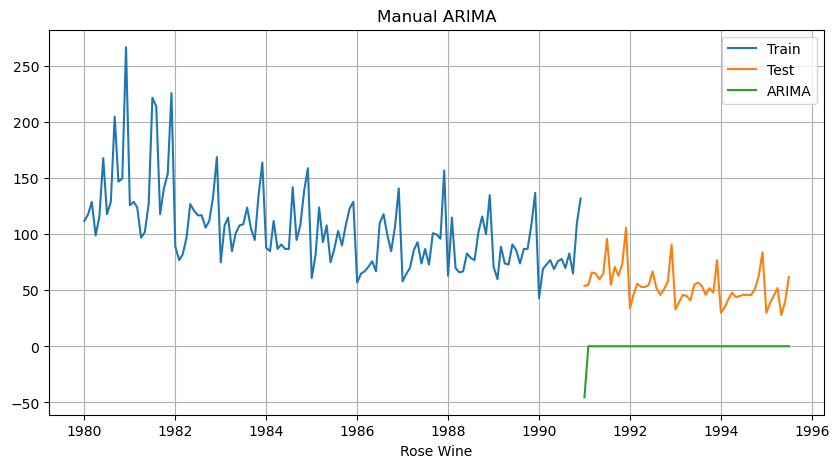

In [73]:
pred_ARIMA_Rose_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_r}, index = test_rose.index)
plt.figure(figsize=(10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Manual ARIMA")
plt.grid()

In [74]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parmeter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parmeter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [75]:
SARIMA_AIC_s = pd.DataFrame(columns=['param', 'seasonal','AIC_Sparkling'])
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
    results_SARIMA_s = SARIMA_model_s.fit(maxiter=1000)
    SARIMA_AIC_s = SARIMA_AIC_s.append({'param':param,'seasonal':param_seasonal ,'AIC_Sparkling': results_SARIMA_s.aic}, ignore_index=True)
        
display(SARIMA_AIC_s.sort_values(by='AIC_Sparkling',ascending=True))

,param,seasonal,AIC_Sparkling
3,"(0, 1, 3)","(3, 0, 3, 12)",2145.168915
15,"(3, 1, 3)","(3, 0, 3, 12)",2275.885179
8,"(2, 1, 0)","(3, 0, 3, 12)",2411.642769
14,"(3, 1, 2)","(3, 0, 3, 12)",2531.672386
7,"(1, 1, 3)","(3, 0, 3, 12)",2795.165023
1,"(0, 1, 1)","(3, 0, 3, 12)",2852.523606
5,"(1, 1, 1)","(3, 0, 3, 12)",2924.361396
10,"(2, 1, 2)","(3, 0, 3, 12)",2970.776732
12,"(3, 1, 0)","(3, 0, 3, 12)",3027.873771
0,"(0, 1, 0)","(3, 0, 3, 12)",3040.049003


In [76]:
SARIMA_AIC_r = pd.DataFrame(columns=['param', 'seasonal','AIC_Rose'])
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
    results_SARIMA_r = SARIMA_model_r.fit(maxiter=1000)
    SARIMA_AIC_r = SARIMA_AIC_r.append({'param':param,'seasonal':param_seasonal ,'AIC_Rose': results_SARIMA_r.aic}, ignore_index=True)
        
display(SARIMA_AIC_r.sort_values(by='AIC_Rose',ascending=True))

,param,seasonal,AIC_Rose
2,"(0, 1, 2)","(3, 0, 3, 12)",2440.454607
15,"(3, 1, 3)","(3, 0, 3, 12)",3068.059042
10,"(2, 1, 2)","(3, 0, 3, 12)",3307.161087
3,"(0, 1, 3)","(3, 0, 3, 12)",3397.296379
4,"(1, 1, 0)","(3, 0, 3, 12)",3489.046771
7,"(1, 1, 3)","(3, 0, 3, 12)",3551.622188
9,"(2, 1, 1)","(3, 0, 3, 12)",3596.012981
6,"(1, 1, 2)","(3, 0, 3, 12)",3642.331486
12,"(3, 1, 0)","(3, 0, 3, 12)",3643.899144
1,"(0, 1, 1)","(3, 0, 3, 12)",3653.008029


In [77]:
auto_SARIMA_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                         order=(3,1,2),
                                         seasonal_order=(3,0,0,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
results_auto_SARIMA_s = auto_SARIMA_s.fit(maxiter=1000)
print(results_auto_SARIMA_s.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 12)   Log Likelihood                -690.809
Date:                             Sun, 07 Jul 2024   AIC                           1399.618
Time:                                     14:27:08   BIC                           1422.314
Sample:                                          0   HQIC                          1408.779
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4044      0.916     -0.441      0.659      -2.201       1.392
ar.L2         -0.3752      

In [78]:
auto_SARIMA_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                         order=(3,1,1),
                                         seasonal_order=(3,0,2,11),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
results_auto_SARIMA_r = auto_SARIMA_r.fit(maxiter=1000)
print(results_auto_SARIMA_r.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 11)   Log Likelihood                -437.103
Date:                                 Sun, 07 Jul 2024   AIC                            894.205
Time:                                         14:27:12   BIC                            919.744
Sample:                                              0   HQIC                           904.525
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1884      0.121      1.551      0.121      -0.050       0

In [79]:
predicted_auto_SARIMA_s = results_auto_SARIMA_s.forecast(steps=len(test_sparkling))
predicted_auto_SARIMA_r = results_auto_SARIMA_r.forecast(steps=len(test_rose))

rmse_model9_test = metrics.mean_squared_error(predicted_auto_SARIMA_s,test_sparkling['Sparkling'],squared=False)

rmse_model99_test = metrics.mean_squared_error(predicted_auto_SARIMA_r,test_rose['Rose'],squared=False)

Spark_resultsDf9 = pd.DataFrame({'Test_Spark RMSE': [rmse_model9_test]},index=['Auto ARIMA (3,1,2)(3,0,0,12)'])
Rose_resultsDf99 = pd.DataFrame({'Test_Rose RMSE': [rmse_model99_test]},index=['Auto ARIMA (3,1,1)(3,0,2,12)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf9])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf99])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011
TES,20.132468


<Figure size 1000x700 with 0 Axes>

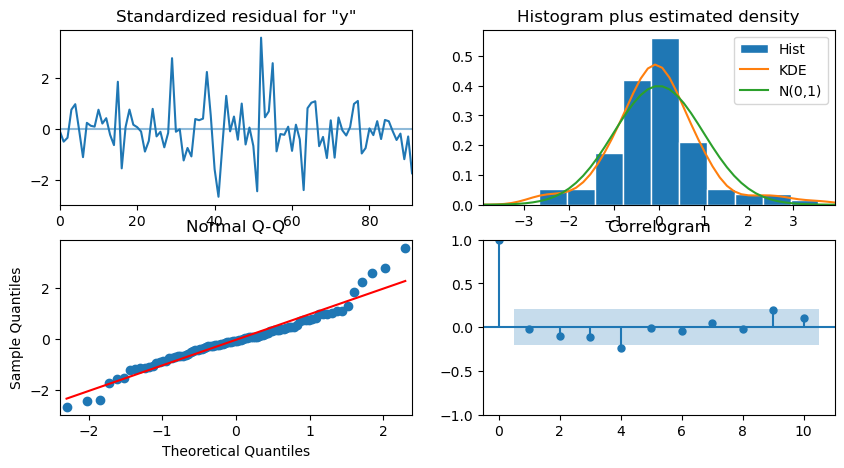

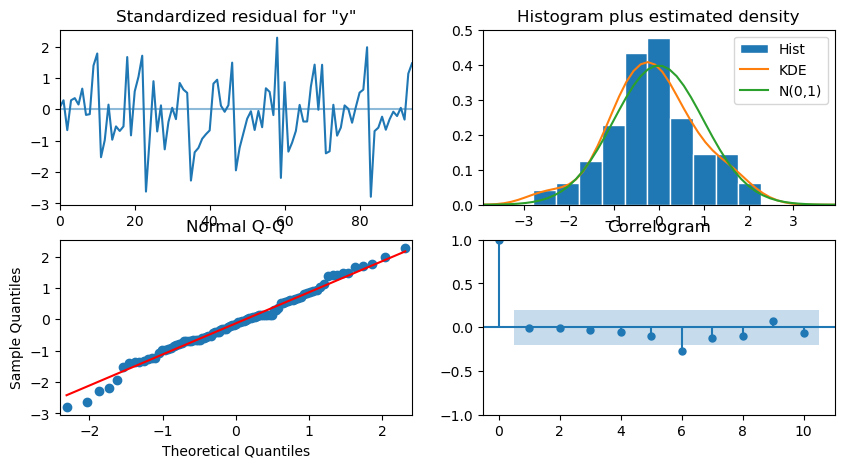

In [80]:
plt.figure(figsize=(10,7))
ax = results_auto_SARIMA_s.plot_diagnostics()
ax1 = results_auto_SARIMA_r.plot_diagnostics()
plt.show()

In [81]:
manual_SARIMA_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=(4,1,2),
                                            seasonal_order=(3,0,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_manual_SARIMA_r = manual_SARIMA_r.fit(maxiter=1000)
print(results_manual_SARIMA_r.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 0, 2, 12)   Log Likelihood                -371.081
Date:                            Sun, 07 Jul 2024   AIC                            766.161
Time:                                    14:27:29   BIC                            796.292
Sample:                                         0   HQIC                           778.317
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7987      0.188     -4.251      0.000      -1.167      -0.430
ar.L2         -0.0110      0.159   

In [82]:
predicted_manual_SARIMA_r = results_manual_SARIMA_r.forecast(steps=len(test_rose))
rmse_model999_test = metrics.mean_squared_error(predicted_manual_SARIMA_r, test_rose['Rose'],squared='False')

Rose_resultsDf999 = pd.DataFrame({'Test_Rose RMSE': [rmse_model999_test]}, index=['Manual SARIMA (4,1,2)(3,0,2,12)'])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf999])
display(Rose_resultsDf)

,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,3029.793011
TES,20.132468


In [83]:
model_TES_spark_fulldata = ExponentialSmoothing(sparkling_df['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark_fulldata = model_TES_spark_fulldata.fit(optimized=True)
display(model_TES_autofit_spark_fulldata.params)

TES_predict_spark_fulldata = model_TES_autofit_spark_fulldata.forecast(steps=12)

{'smoothing_level': 0.07596713146311772,
 'smoothing_trend': 0.03256921715086211,
 'smoothing_seasonal': 0.37660762886165167,
 'damping_trend': nan,
 'initial_level': 2356.500087258337,
 'initial_trend': -0.8449338106956193,
 'initial_seasons': array([-636.25474139, -723.00153617, -398.66964817, -473.45571811,
        -808.43306854, -815.37001157, -384.24814771,   73.00119661,
        -237.46281546,  272.34574748, 1541.39349329, 2590.11477306]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
Sparkling_forecast = pd.DataFrame({'Sparkling Forecast': TES_predict_spark_fulldata})
date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Sparkling_forecast['Time'] = date
Sparkling_forecast.set_index('Time',inplace=True)

std = Sparkling_forecast['Sparkling Forecast'].std()
se = (1.96*std)/np.sqrt(len(Sparkling_forecast))

Sparkling_forecast['lower CI'] = Sparkling_forecast['Sparkling Forecast'] - se
Sparkling_forecast['upper CI'] = Sparkling_forecast['Sparkling Forecast'] + se
Sparkling_forecast

,Sparkling Forecast,lower CI,upper CI
Time,,,
1995-08-31,1877.431801,1093.245271,2661.618332
1995-09-30,2405.285747,1621.099217,3189.472277
1995-10-31,3242.105698,2457.919168,4026.292228
1995-11-30,3922.189524,3138.002994,4706.376054
1995-12-31,6118.502404,5334.315873,6902.688934
1996-01-31,1262.618990,478.432459,2046.805520
1996-02-29,1592.137914,807.951384,2376.324444
1996-03-31,1831.652945,1047.466415,2615.839475
1996-04-30,1806.470072,1022.283542,2590.656602


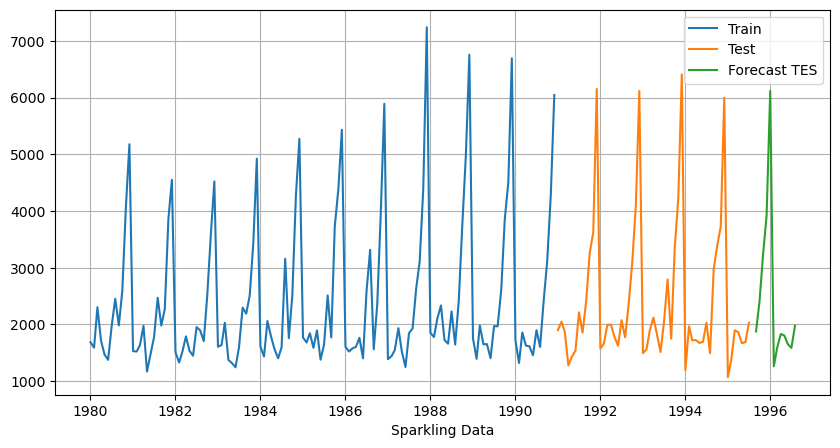

In [85]:
plt.figure(figsize=(10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(Sparkling_forecast['Sparkling Forecast'], label='Forecast TES')

plt.legend(loc='best')
plt.xlabel('Sparkling Data')
plt.grid()

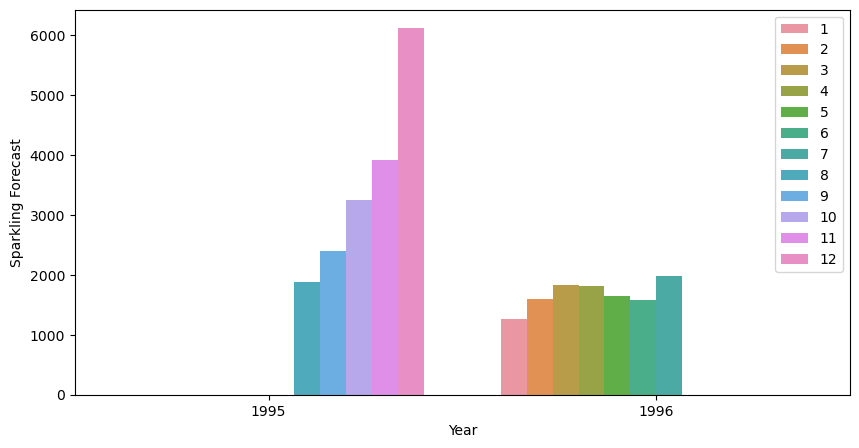

In [86]:
Sparkling_forecast['Year'] = Sparkling_forecast.index.year
Sparkling_forecast['Month'] = Sparkling_forecast.index.month

sns.barplot(x = Sparkling_forecast['Year'], y = Sparkling_forecast['Sparkling Forecast'], hue = Sparkling_forecast['Month'])
plt.legend(loc = 'upper right')
plt.show()

In [87]:
manual_SARIMA_fullrosedata = sm.tsa.statespace.SARIMAX(rose_df['Rose'].values,
                                            order=(4,1,2),
                                            seasonal_order=(3,0,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_manual_fullrosedata = manual_SARIMA_fullrosedata.fit(maxiter=1000)
predicted_manual_SARIMA_fullrosedata = results_manual_fullrosedata.get_forecast(steps=12)
Rose_forecast1 = predicted_manual_SARIMA_fullrosedata.summary_frame(alpha=0.05)

data = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Rose_forecast1['Time'] = date
Rose_forecast1.set_index('Time',inplace=True)
Rose_forecast1

y,mean,mean_se,mean_ci_lower,mean_ci_upper
Time,,,,
1995-08-31,46.416442,11.969944,22.955782,69.877101
1995-09-30,48.794000,12.040470,25.195111,72.392888
1995-10-31,47.509959,12.109009,23.776738,71.243180
1995-11-30,56.272244,12.121591,32.514362,80.030125
1995-12-31,77.866941,12.122068,54.108124,101.625759
1996-01-31,28.707477,12.214944,4.766626,52.648328
1996-02-29,37.191718,12.375344,12.936490,61.446945
1996-03-31,42.403461,12.562592,17.781233,67.025688
1996-04-30,40.941188,12.729073,15.992663,65.889713


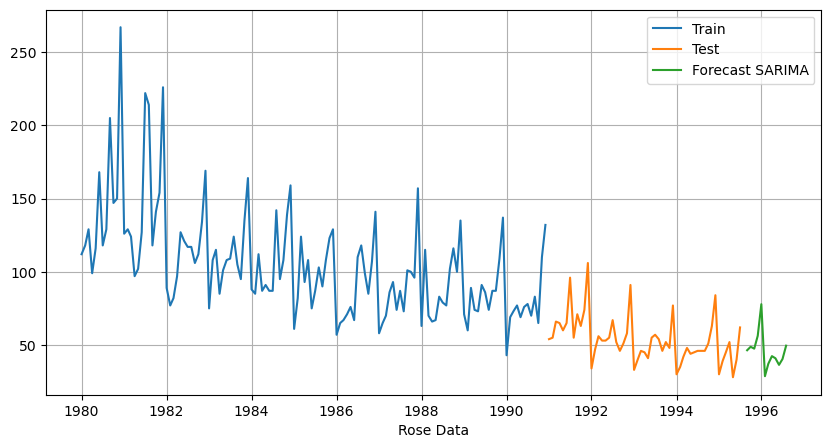

In [88]:
plt.figure(figsize=(10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(Rose_forecast1['mean'], label='Forecast SARIMA')

plt.legend(loc='best')
plt.xlabel('Rose Data')
plt.grid()

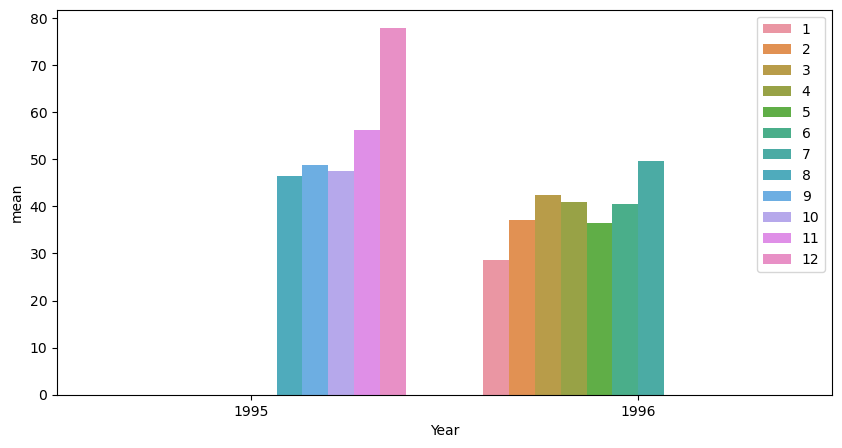

In [89]:
Rose_forecast1['Year'] = Rose_forecast1.index.year
Rose_forecast1['Month'] = Rose_forecast1.index.month

sns.barplot(x = Rose_forecast1['Year'], y = Rose_forecast1['mean'], hue = Rose_forecast1['Month'])
plt.legend(loc = 'upper right')
plt.show()